In [1]:
from auditory_cortex.computational_models.baseline import STRF
from auditory_cortex.dataloader import DataLoader

import os
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, ElasticNetCV
from auditory_cortex import saved_corr_dir, aux_dir
from auditory_cortex.analyses import STRFCorrelations
import matplotlib.pylab as plt
%matplotlib inline

/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [ ]:
from auditory_cortex import results_dir

In [20]:
model_names = ['STRF_freqs80_mel', 'STRF_freqs80_wavlet']
model_name = model_names[1]
identifier = 'timit_trf_lags300_bw50_naplib_matched'
corr_obj = STRFCorrelations(model_name+'_'+identifier)
# sessions_done = len(corr_obj.data['session'].unique())

# naplib_matched

Using default normalizer file...


In [17]:
corr_obj.get_filepath()

'/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_wavlet_timit_trf_lags300_bw50_version_1_corr_results.csv'

In [18]:
corr_file_path = '/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_wavlet_timit_trf_lags300_bw50_naplib_matched_corr_results.csv'

In [19]:
corr_obj.data.to_csv(corr_file_path, index=False)

In [4]:
sessions_done

39

In [2]:
model_names = [
	# 'STRF_freqs80_wavlet',
	'STRF_freqs80_mel',
]

identifier = 'mVocs_trf_lags300_bw50_version_1'
# identifier = 'timit_trf_lags300_bw50_version_1'

if 'mVocs' in identifier:
	mVocs = True
	total_sessions = 39
else:
	mVocs = False
	total_sessions = 41
for model_name in model_names:
	corr_obj = STRFCorrelations(model_name+'_'+identifier)
	sessions_done = len(corr_obj.data['session'].unique())
	print(f"sessions done: {sessions_done}")
	if sessions_done == total_sessions:
		corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)
		# corr_obj.set_normalizers_using_bootsrap()


Using default normalizer file...
sessions done: 39
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_mel_mVocs_trf_lags300_bw50_version_1_corr_results.csv


In [5]:
# model_name = 'STRF_freqs80_wavlet'
model_name = 'STRF_freqs80_mel'
# identifier = 'mVocs_mel_lags300'
# identifier = 'mVocs_mel_lags300_gpu'
# identifier = 'mVocs_mel_test_gpu_0'
identifier = 'mVocs_trf_lags300_lmbda'
# identifier = 'mVocs_trf_lags300_norm_bias'
corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[
	# (corr_obj.data['session'] == 200206) &\
	(corr_obj.data['mVocs_normalizer'] > 0.089)
	]
np.median(data['mVocs_normalized_test_cc'])


Using default normalizer file...


0.37218031060915535

In [5]:
model_name = 'STRF_freqs80_wavlet'
# identifier = 'mVocs_mel_lags300'
# identifier = 'mVocs_mel_lags300_gpu'
# identifier = 'mVocs_mel_test_gpu_0'
# identifier = 'mVocs_wavelet_test_gpu_0'
identifier = 'mVocs_trf_lags300_bias'
corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[
	# (corr_obj.data['session'] == 200206) &\
	(corr_obj.data['mVocs_normalizer'] > 0.089)
	]
np.median(data['mVocs_normalized_test_cc'])


Using default normalizer file...


0.4935425252766801

In [3]:
model_name = 'STRF_freqs80_wavlet'
# identifier = 'mVocs_mel_lags300'
# identifier = 'mVocs_mel_lags300_gpu'
# identifier = 'mVocs_mel_test_gpu_0'
# identifier = 'mVocs_wavelet_test_gpu_0'
identifier = 'mVocs_trf_lags300_norm_twice'
corr_obj = STRFCorrelations(model_name+'_'+identifier)
corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[
	# (corr_obj.data['session'] == 200206) &\
	(corr_obj.data['mVocs_normalizer'] > 0.089)
	]
np.median(data['mVocs_normalized_test_cc'])


Using default normalizer file...
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_wavlet_mVocs_trf_lags300_norm_twice_corr_results.csv


0.38256415489278905

In [9]:
model_name = 'STRF_freqs80'
# identifier = 'mVocs_mel_lags300'
# identifier = 'mVocs_mel_lags300_gpu'
# identifier = 'mVocs_mel_test_gpu_0'
# identifier = 'mVocs_wavelet_test_gpu_0'
identifier = 'mVocs_wavelet_test_gpu_1'
corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[(corr_obj.data['mVocs_normalizer'] > 0.089) &\
	(corr_obj.data['session'] == 200206)]
np.median(data['mVocs_normalized_test_cc'])


Using default normalizer file...


0.4439271173996525

(array([284.,   0.,   0., 915.,   0.,   0., 363.,   0.,   0.,  32.]),
 array([-2. , -1.7, -1.4, -1.1, -0.8, -0.5, -0.2,  0.1,  0.4,  0.7,  1. ]),
 <BarContainer object of 10 artists>)

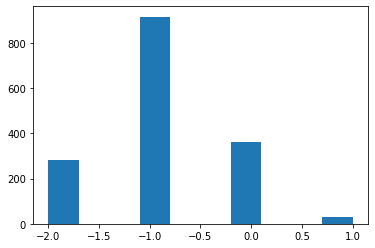

In [10]:
plt.hist(corr_obj.data['lmbda'])
# plt.xlim([-2,12])

In [12]:
np.logspace(-2, 10, 13)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [14]:
np.logspace(-2, 12, 15)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11, 1.e+12])

In [13]:
model_name = 'STRF_freqs80'
identifier = 'mVocs_wavlet_lags300'

corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[(corr_obj.data['mVocs_normalizer'] > 0.089)]
np.median(data['mVocs_normalized_test_cc'])


Using default normalizer file...


0.5396795456544174

(-2.0, 12.0)

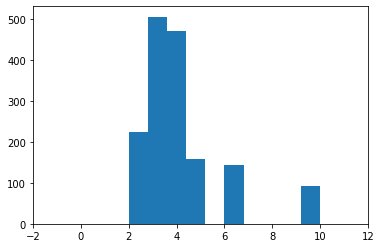

In [9]:
plt.hist(corr_obj.data['lmbda'])
plt.xlim([-2,12])

In [14]:
model_name = 'STRF_freqs80'
identifier = 'mVocs_mel_lags300'

corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[(corr_obj.data['mVocs_normalizer'] > 0.089)]
np.median(data['mVocs_normalized_test_cc'])

Using default normalizer file...


0.3900868278739812

(-2.0, 12.0)

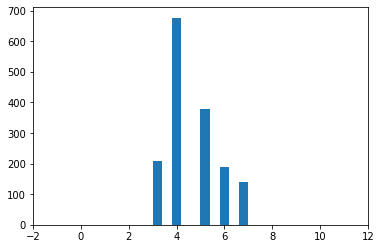

In [15]:
plt.hist(corr_obj.data['lmbda'])
plt.xlim([-2,12])

In [17]:
model_name = 'STRF_freqs80'
identifier = 'mVocs_mel_lags300_gpu'

corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap()

data = corr_obj.data[(corr_obj.data['mVocs_normalizer'] > 0.089)]
np.median(data['mVocs_normalized_test_cc'])

Using default normalizer file...


0.4071367552438838

(-2.0, 12.0)

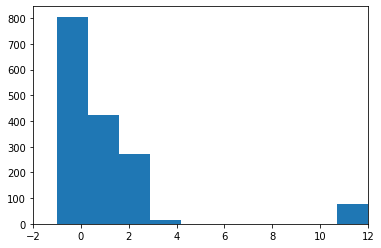

In [18]:
plt.hist(corr_obj.data['lmbda'])
plt.xlim([-2,12])

In [19]:

model_name = 'STRF_freqs80'
identifier = 'mVocs_wavelet_test_gpu_2'

corr_obj = STRFCorrelations(model_name+'_'+identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[(corr_obj.data['mVocs_normalizer'] > 0.089) &\
	(corr_obj.data['session'] == 200206)]
np.median(data['mVocs_normalized_test_cc'])

Using default normalizer file...
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_mVocs_wavelet_test_gpu_2_corr_results.csv


0.43212507047107657

(-5.0, 10.0)

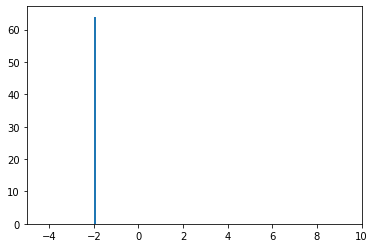

In [21]:
plt.hist(corr_obj.data['lmbda'])
plt.xlim([-5,10])

In [2]:
model_name = 'STRF_freqs80'
identifier = 'timit_wavelet_lags300_gpu'

corr_obj = STRFCorrelations(model_name+'_'+identifier)
corr_obj.set_normalizers_using_bootsrap()

data = corr_obj.data[(corr_obj.data['normalizer'] > 0.08)]
np.median(data['normalized_test_cc'])

Using default normalizer file...
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_timit_wavelet_lags300_gpu_corr_results.csv


0.3305248552167379

In [3]:
model_name = 'STRF_freqs80'
identifier = 'timit_mel_lags300_gpu'

corr_obj = STRFCorrelations(model_name+'_'+identifier)
corr_obj.set_normalizers_using_bootsrap()

data = corr_obj.data[(corr_obj.data['normalizer'] > 0.08)]
np.median(data['normalized_test_cc'])

Using default normalizer file...
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_timit_mel_lags300_gpu_corr_results.csv


0.48534886085706086

#### combine results...

In [8]:
def display_sessions_done(model_name, identifier, verbose=False):
	"""Display the number of sessions done for all bin widths
	"""
	if verbose:
		print(f"For '{model_name}', '{identifier}'")
	corr_obj = STRFCorrelations(model_name+'_'+identifier)
	bin_width = np.sort(corr_obj.data['bin_width'].unique())[0]
	data = corr_obj.get_selected_data(bin_width=bin_width)
	print(f"For bin_width: {bin_width:03} ms, sessions done: {len(data['session'].unique())}")
	return len(data['session'].unique())
	

def check_saved_results(model_names, identifier, verbose=False, num_sessions=41):

	models_not_done = []
	num_freqs = 80
	model_name = f'STRF_freqs{num_freqs}'
	identifiers = [
		identifier,
		f'{identifier}_5_10',
		f'{identifier}_10_15',
		f'{identifier}_15_20',
		f'{identifier}_20_25',
		f'{identifier}_25_30',
		f'{identifier}_30_34',
		f'{identifier}_34_37',
		f'{identifier}_37'
	]

	if model_name in model_names:
		sessions_done = 0
		for identifier in identifiers:
			sessions_done += display_sessions_done(
				model_name, identifier, verbose=verbose)
		print(f"Total sessions done: {sessions_done}")
		if sessions_done != num_sessions:
			models_not_done.append(model_name)
			print(f"Sessions done: {sessions_done}")
		

	# remove None entries..
	while None in models_not_done:
		models_not_done.remove(None)
	
	if len(models_not_done) ==0:
		print(f"All models done..for {identifier}")
	else:
		print(f"Models with incomplete resutls:")
		for iden in models_not_done:
			print(iden)
	

def combine_results_for_all_models(identifier, model_names=None):
	"""Combines results for the list of models provided"""
	normalizer_filename = 'modified_bins_normalizer.csv'
	num_freqs = 80
	model_name = f'STRF_freqs{num_freqs}'
	if model_names is None or model_name in model_names:
		ids = [
			identifier,
			f'{identifier}_5_10',
			f'{identifier}_10_15',
			f'{identifier}_15_20',
			f'{identifier}_20_25',
			f'{identifier}_25_30',
			f'{identifier}_30_34',
			f'{identifier}_34_37',
			f'{identifier}_37'
			]
		STRFCorrelations.combine_and_ready(model_name,
			ids, 0, normalizer_filename=normalizer_filename)
		


In [11]:

check_saved_results(['STRF_freqs80'], 'mVocs_mel_lags300', verbose=True, num_sessions=39)

For 'STRF_freqs80', 'mVocs_mel_lags300'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 5
For 'STRF_freqs80', 'mVocs_mel_lags300_5_10'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 5
For 'STRF_freqs80', 'mVocs_mel_lags300_10_15'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 5
For 'STRF_freqs80', 'mVocs_mel_lags300_15_20'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 5
For 'STRF_freqs80', 'mVocs_mel_lags300_20_25'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 4
For 'STRF_freqs80', 'mVocs_mel_lags300_25_30'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 5
For 'STRF_freqs80', 'mVocs_mel_lags300_30_34'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 4
For 'STRF_freqs80', 'mVocs_mel_lags300_34_37'
Using default normalizer file...
For bin_width: 50.0 ms, sessions done: 3
For 'STRF_freqs80', 'mVocs_mel_lags300_37'
Usin

In [12]:
combine_results_for_all_models('mVocs_mel_lags300', model_names=['STRF_freqs80'])

Combining results...
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_mVocs_mel_lags300_corr_results.csv


In [5]:
model_name = 'STRF_freqs80'
# identifier = 'mVocs_mel_lags300'
# identifier = 'mVocs_mel_lags300_gpu'
# identifier = 'mVocs_mel_test_gpu_0'
# identifier = 'mVocs_wavelet_test_gpu_0'
identifier = 'mVocs_wavelet_test_gpu_1'
corr_obj = STRFCorrelations(model_name+'_'+identifier)
corr_obj.set_normalizers_using_bootsrap(mVocs=True)

data = corr_obj.data[corr_obj.data['mVocs_normalizer'] > 0.089]
np.median(data['mVocs_normalized_test_cc'])


Using default normalizer file...
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_mVocs_wavelet_test_gpu_1_corr_results.csv


In [7]:
data = corr_obj.data[corr_obj.data['mVocs_normalizer'] > 0.089]
np.median(data['mVocs_normalized_test_cc'])

0.3430655757393374

#### rest of it...

In [4]:
# iden = 'mVocs' 
# iden = 'mel_spectrogram' 
iden = 'mVocs_mel_spectrogram' 
corr_obj = STRFCorrelations(model_name = f"STRF_freqs80_{iden}")

# corr_obj.set_normalizers_using_bootsrap()

Using default normalizer file...


(array([ 0.,  0.,  0.,  0.,  0., 64.,  0.,  0.,  0.,  0.]),
 array([-0.19897, -0.09897,  0.00103,  0.10103,  0.20103,  0.30103,
         0.40103,  0.50103,  0.60103,  0.70103,  0.80103]),
 <BarContainer object of 10 artists>)

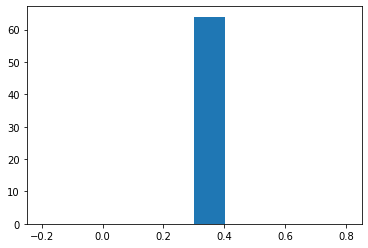

In [12]:
import matplotlib.pylab as plt
plt.hist(np.log10(corr_obj.data['lmbda']))

In [7]:
# os.remove('/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_cross_validated_corr_results.csv')

In [56]:
baseline_corr['tmax'].unique()

array([20., 40.])

In [47]:

iden = 'poissrdge_34' # s=34
num_freqs = 80
STRF_filename = f'STRF_freqs{num_freqs}_{iden}_corr_results.csv'
STRF_file_path = os.path.join(saved_corr_dir, STRF_filename)
print(f"Reading from: {STRF_file_path}")
baseline_corr = pd.read_csv(STRF_file_path)
len(baseline_corr['session'].unique())
baseline_corr[baseline_corr['session']==200206]['strf_corr'].median()

Reading from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_poissrdge_34_corr_results.csv


0.25524071400862686

In [45]:
iden = 'rdge_34' # s=34
num_freqs = 80
STRF_filename = f'STRF_freqs{num_freqs}_{iden}_corr_results.csv'
STRF_file_path = os.path.join(saved_corr_dir, STRF_filename)
print(f"Reading from: {STRF_file_path}")
baseline_corr = pd.read_csv(STRF_file_path)
len(baseline_corr['session'].unique())
baseline_corr[baseline_corr['session']==200206]['strf_corr'].median()

Reading from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_rdge_34_corr_results.csv


0.3065583158608634

In [41]:
iden = 'rdgecv_34' 

num_freqs = 80
STRF_filename = f'STRF_freqs{num_freqs}_{iden}_corr_results.csv'
STRF_file_path = os.path.join(saved_corr_dir, STRF_filename)
print(f"Reading from: {STRF_file_path}")
baseline_corr = pd.read_csv(STRF_file_path)
len(baseline_corr['session'].unique())
baseline_corr[baseline_corr['session']==200206]['strf_corr'].median()

Reading from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_rdgecv_34_corr_results.csv


0.3052084972835195

In [40]:
iden = 'bw50'

num_freqs = 80
STRF_filename = f'STRF_freqs{num_freqs}_{iden}_corr_results.csv'
STRF_file_path = os.path.join(saved_corr_dir, STRF_filename)
print(f"Reading from: {STRF_file_path}")
baseline_corr = pd.read_csv(STRF_file_path)
len(baseline_corr['session'].unique())
baseline_corr[baseline_corr['session']==200206]['strf_corr'].median()

Reading from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_bw50_corr_results.csv


0.2411206022548017

In [42]:
iden = 'cross_validated'
num_freqs = 80
STRF_filename = f'STRF_freqs{num_freqs}_{iden}_corr_results.csv'
STRF_file_path = os.path.join(saved_corr_dir, STRF_filename)
print(f"Reading from: {STRF_file_path}")
baseline_corr = pd.read_csv(STRF_file_path)
len(baseline_corr['session'].unique())
baseline_corr[baseline_corr['session']==200206]['strf_corr'].median()

Reading from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_cross_validated_corr_results.csv


0.21565845692882085

In [6]:
baseline_corr['session'].unique()

array([180724., 180728., 180413., 190604., 190605., 191121., 190606.,
       200207., 200212.])

In [4]:
from auditory_cortex.analyses import STRFCorrelations
iden = 'cross_validated'
STRF_results_identifier=f'STRF_freqs80_{iden}'
strf_obj = STRFCorrelations(STRF_results_identifier)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [2]:
from auditory_cortex.analyses import STRFCorrelations
STRF_results_identifier='STRF_freqs80_bw50'
strf_obj = STRFCorrelations(STRF_results_identifier)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated using normalizer (app) dist , writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_bw50_corr_results.csv


In [3]:
baseline_corr

,session,channel,bin_width,delay,num_freqs,tmin,tmax,strf_corr,test_cc_raw,normalizer,normalized_test_cc
0,180413.0,0.0,50.0,0.0,80.0,0.0,0.3,-0.071255,-0.071255,0.003512,-1.202337
1,180413.0,1.0,50.0,0.0,80.0,0.0,0.3,-0.004840,-0.004840,0.004870,-0.069363
2,180413.0,2.0,50.0,0.0,80.0,0.0,0.3,-0.059212,-0.059212,-0.000009,NaN
3,180413.0,3.0,50.0,0.0,80.0,0.0,0.3,0.133844,0.133844,-0.010641,NaN
4,180413.0,4.0,50.0,0.0,80.0,0.0,0.3,0.072941,0.072941,-0.016452,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1713,200318.0,40.0,50.0,0.0,80.0,0.0,0.3,-0.129373,-0.129373,0.013082,-1.131133
1714,200318.0,41.0,50.0,0.0,80.0,0.0,0.3,-0.126037,-0.126037,-0.007986,NaN
1715,200318.0,42.0,50.0,0.0,80.0,0.0,0.3,0.025005,0.025005,-0.000663,NaN
1716,200318.0,43.0,50.0,0.0,80.0,0.0,0.3,-0.087960,-0.087960,0.002100,-1.919378


In [8]:
baseline_corr['tmax'].unique()

array([0.01 , 0.02 , 0.04 , 0.06 , 0.08 , 0.1  , 0.2  , 0.3  , 0.4  ,
       0.5  , 0.6  , 0.005])

In [3]:
baseline_corr

,session,channel,bin_width,delay,num_freqs,tmin,tmax,strf_corr,test_cc_raw,normalizer,normalized_test_cc
0,180413.0,0.0,20.0,0.0,80.0,0.0,0.01,0.036987,0.036987,0.012303,0.333456
1,180413.0,1.0,20.0,0.0,80.0,0.0,0.01,-0.001129,-0.001129,-0.006701,NaN
2,180413.0,2.0,20.0,0.0,80.0,0.0,0.01,-0.054922,-0.054922,0.006253,-0.694538
3,180413.0,3.0,20.0,0.0,80.0,0.0,0.01,0.009293,0.009293,-0.004253,NaN
4,180413.0,4.0,20.0,0.0,80.0,0.0,0.01,-0.038279,-0.038279,-0.019774,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22329,200318.0,40.0,50.0,0.0,80.0,0.0,0.30,-0.086681,NaN,0.013082,NaN
22330,200318.0,41.0,50.0,0.0,80.0,0.0,0.30,-0.066152,NaN,-0.007986,NaN
22331,200318.0,42.0,50.0,0.0,80.0,0.0,0.30,0.035989,NaN,-0.000663,NaN
22332,200318.0,43.0,50.0,0.0,80.0,0.0,0.30,-0.047702,NaN,0.002100,NaN


In [4]:
bin_width = 50
delay = 0
area = 'all'
normalized = True

In [11]:
from auditory_cortex.analyses import STRFCorrelations
STRF_results_identifier='STRF_freqs80_all_lags'
strf_obj = STRFCorrelations(STRF_results_identifier)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [13]:
strf_obj.data['test_cc_raw'] = strf_obj.data['strf_corr']

In [14]:
strf_obj.data

,session,channel,bin_width,delay,num_freqs,tmin,tmax,strf_corr,test_cc_raw,normalizer,normalized_test_cc
0,180413.0,0.0,20.0,0.0,80.0,0.0,0.01,0.036987,0.036987,0.012303,0.333456
1,180413.0,1.0,20.0,0.0,80.0,0.0,0.01,-0.001129,-0.001129,-0.006701,NaN
2,180413.0,2.0,20.0,0.0,80.0,0.0,0.01,-0.054922,-0.054922,0.006253,-0.694538
3,180413.0,3.0,20.0,0.0,80.0,0.0,0.01,0.009293,0.009293,-0.004253,NaN
4,180413.0,4.0,20.0,0.0,80.0,0.0,0.01,-0.038279,-0.038279,-0.019774,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22329,200318.0,40.0,50.0,0.0,80.0,0.0,0.30,-0.086681,-0.086681,0.013082,NaN
22330,200318.0,41.0,50.0,0.0,80.0,0.0,0.30,-0.066152,-0.066152,-0.007986,NaN
22331,200318.0,42.0,50.0,0.0,80.0,0.0,0.30,0.035989,0.035989,-0.000663,NaN
22332,200318.0,43.0,50.0,0.0,80.0,0.0,0.30,-0.047702,-0.047702,0.002100,NaN


In [15]:
strf_obj.set_normalizers()

Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_all_lags_corr_results.csv


In [16]:
strf_obj.data

,session,channel,bin_width,delay,num_freqs,tmin,tmax,strf_corr,test_cc_raw,normalizer,normalized_test_cc
0,180413.0,0.0,20.0,0.0,80.0,0.0,0.01,0.036987,0.036987,0.012303,0.333456
1,180413.0,1.0,20.0,0.0,80.0,0.0,0.01,-0.001129,-0.001129,-0.006701,NaN
2,180413.0,2.0,20.0,0.0,80.0,0.0,0.01,-0.054922,-0.054922,0.006253,-0.694538
3,180413.0,3.0,20.0,0.0,80.0,0.0,0.01,0.009293,0.009293,-0.004253,NaN
4,180413.0,4.0,20.0,0.0,80.0,0.0,0.01,-0.038279,-0.038279,-0.019774,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22329,200318.0,40.0,50.0,0.0,80.0,0.0,0.30,-0.086681,-0.086681,0.013082,-0.757873
22330,200318.0,41.0,50.0,0.0,80.0,0.0,0.30,-0.066152,-0.066152,-0.007986,NaN
22331,200318.0,42.0,50.0,0.0,80.0,0.0,0.30,0.035989,0.035989,-0.000663,NaN
22332,200318.0,43.0,50.0,0.0,80.0,0.0,0.30,-0.047702,-0.047702,0.002100,-1.040907


In [5]:


from auditory_cortex.analyses import STRFCorrelations
STRF_results_identifier='STRF_freqs80_all_lags'
strf_obj = STRFCorrelations(STRF_results_identifier)


threshold= strf_obj.get_normalizer_threshold(
    bin_width=bin_width, poisson_normalizer=True
)

baseline_dist = strf_obj.get_corr_for_area(
    neural_area=area, bin_width=bin_width, delay=delay,
    threshold=threshold, normalized=normalized, lag=None,   # saying lag=0.3
)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Reading exisiting normalizer thresholds...


In [6]:
baseline_dist.values.shape

(241,)

In [7]:
baseline_dist

20727   NaN
20731   NaN
20745   NaN
20746   NaN
20747   NaN
         ..
22261   NaN
22262   NaN
22263   NaN
22264   NaN
22284   NaN
Name: normalized_test_cc, Length: 241, dtype: float64

### Cross-validation over lags..

### creating baseline correlations class...

In [51]:
import os
import yaml
import pickle
import numpy as np
import pandas as pd
import scipy as scp
# import seaborn as sns
import matplotlib as mpl
# import plotly.express as px
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# from sklearn.decomposition import PCA

from palettable.colorbrewer import qualitative

#local 
import auditory_cortex.utils as utils
from auditory_cortex.utils import CorrelationUtils
from auditory_cortex.neural_data import NeuralMetaData
from auditory_cortex.neural_data.normalizer import Normalizer
from auditory_cortex import session_to_coordinates, session_to_subject, session_to_area#, CMAP_2D
from auditory_cortex import saved_corr_dir, aux_dir
from auditory_cortex.io_utils import io

class BaseCorrelations:
    def __init__(
            self, model_name, normalizer_filename=None, third=None
        ) -> None:
        
        self.model = model_name
        filename = f'{model_name}_corr_results.csv'
        self.corr_file_path = os.path.join(saved_corr_dir, filename)
        self.metadata = NeuralMetaData()
        self.norm_obj = Normalizer(normalizer_filename)

        self.data = pd.read_csv(self.corr_file_path)
        # check if 'test_cc_raw' not one of the columns
        # this will be the case for STRF correlations
        # in that case, copy 'strf_corr' to 'test_cc_raw'
        if 'test_cc_raw' not in self.data.columns:
            self.data['test_cc_raw'] = self.data['strf_corr']
            print(f"'test_cc_raw added as a column..!")
        
        if 'normalizer' not in self.data.columns:
            self.data.loc[:, 'normalizer'] = np.nan
            self.set_normalizers()


    def get_selected_data(
                self, sessions: list=None, bin_width=None, delay=None, channel=None
        ):
        """Retrieves selected data based on provided arguments. 
        If an argument if 'None', no filter is applied on that column.

        Args:
            sessions: list of ints = list of sessions IDs to get data for.
            bin_width: int = bin_width in ms.
            delay: int = delay in ms.
        
        Returns:
            pandas DataFrame
        """
        select_data = self.data
        if bin_width is not None:
            select_data = select_data[select_data['bin_width']==float(bin_width)]
        
        if delay is not None:
            select_data = select_data[select_data['delay']==float(delay)]
        
        if channel is not None:
            select_data = select_data[select_data['channel']==float(channel)]

        if sessions is not None:
            session_data = []
            # sessions is a list...
            for session in sessions:
                session_data.append(select_data[
                        (select_data['session']==float(session))
                    ])
            select_data = pd.concat(session_data)
        return select_data


# ------------------  Retrieve data for analysis ----------------#

    def get_normalizer_threshold(self, bin_width=20, poisson_normalizer=True):
        """Retrieves significance threshold from the NULL distribution
        of normalizer.
        """
        threshold_dict = io.read_normalizer_threshold(
            bin_width=bin_width, poisson_normalizer=poisson_normalizer
            )
        if threshold_dict is None or bin_width not in threshold_dict.keys():
            if poisson_normalizer:
                threshold = self.norm_obj.compute_normalizer_threshold_using_poisson(bin_width=bin_width)[0]
            else:
                threshold = self.norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

            io.write_normalizer_threshold(
                bin_width=bin_width, poisson_normalizer=poisson_normalizer,
                thresholds=threshold
            )
            return threshold
        else:
            return threshold_dict[bin_width]



    # ------------------  copy normalizer for all bin-widths ----------------#
    def set_normalizers(self, bin_widths: list=None):
        """Set normalizers (repeatability correlations) from the saved results.
        """
        if bin_widths is None:
            bin_widths = self.data['bin_width'].unique()
        for bin_width in bin_widths:
            select_data = self.get_selected_data(bin_width=bin_width)
            sessions = select_data['session'].unique()
            delays = select_data['delay'].unique()
            for session in sessions:
                for delay in delays:
                    select_data = self.get_selected_data(
                        sessions=[session], bin_width=bin_width, delay=delay
                    )
                    channels = select_data['channel'].unique()
                    selected_normalizers = self.norm_obj.get_normalizer_for_session(
                        session=session, bin_width=bin_width, delay=delay
                        )
                    for ch in channels:
                        ids = select_data[select_data['channel']==ch].index
                        ch_normalizer = selected_normalizers[
                                selected_normalizers['channel']==ch
                            ]['normalizer'].head(1).item()
                        self.data.loc[ids, 'normalizer'] = ch_normalizer #/0.82   # adjusting for context..

        self.data['normalized_test_cc'] = self.data['test_cc_raw']/(self.data['normalizer'].apply(np.sqrt))
        print(f"Normalizers updated FOR CONTEXT AS WELL, writing back now...")
        self.write_back()

    def write_back(self):
        """Saves the updated dataframe to disk."""
        self.data.to_csv(self.corr_file_path, index=False)
        print(f"Saved at {self.corr_file_path}")


    @staticmethod
    def merge_correlation_results(model_name, identifiers_list, output_id, output_identifier=None):
        """
        Args:

            model_name: Name of the pre-trained network
            file_identifiers: List of filename identifiers 
            idx:    id of the file identifier to use for saving the merged results
            output_identifier: if output_identifier is given, it takes preference..
        """
        # results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'

        corr_dfs = []
        for identifier in identifiers_list:
            filename = f"{model_name}_{identifier}_corr_results.csv"
            file_path = os.path.join(saved_corr_dir, filename)

            corr_dfs.append(pd.read_csv(file_path))

        # save the merged results at the very first filename...
        if output_identifier is None:
            output_identifier = identifiers_list[output_id]    
        filename = f"{model_name}_{output_identifier}_corr_results.csv"
        file_path = os.path.join(saved_corr_dir, filename)

        data = pd.concat(corr_dfs)
        data.to_csv(file_path, index=False)
        print(f"Output saved at: \n {file_path}")

        # once all the files have been merged, remove the files..
        for identifier in identifiers_list:
            if identifier != output_identifier:
                filename = f"{model_name}_{identifier}_corr_results.csv"
                file_path = os.path.join(saved_corr_dir, filename)
                # remove the file
                os.remove(file_path)



class STRFCorrelations(BaseCorrelations):
    def __init__(
            self, identifier = None, third=None, normalizer_filename=None,
            
        ) -> None:
        if identifier is None:
            model_name = f'STRF_freqs80_all_lags'
        else:
            model_name = f'STRF_{identifier}'
        super().__init__(model_name, third, normalizer_filename)


    def get_correlations(
            self, sessions:list=None, bin_width=20, delay=0,
            threshold=None, lag=None, normalized=True
        ):
        """Retrieves the column of correlations (normalized or un-normalized), for the
        given selections filters.
        """
        
        column='test_cc_raw'
        if normalized:
            column = 'normalized_test_cc'

        selected_data = self.get_selected_data(
            sessions=sessions, bin_width=bin_width, delay=delay
        )
        if threshold is not None:
            selected_data = selected_data[
                (selected_data['normalizer']>=threshold)
            ]
        if lag is not None:
            selected_data = selected_data[
                (selected_data['tmax']==lag)
            ]

        return selected_data[column]
    
    def get_corr_for_area(
            self, neural_area='core',bin_width=20, delay=0,
            threshold=0.068, lag=None, normalized=True
        ):
        """Retrieves baseline correlations for all sig. sessions."""
        area_sessions = self.metadata.get_all_sessions(neural_area)

        corr_dist = self.get_correlations(
            sessions=area_sessions, bin_width=bin_width, delay=delay,
            threshold=threshold, lag=lag, normalized=normalized
        )
        return corr_dist




    @staticmethod
    def combine_and_ready(
            model_name, identifiers_list, output_id, normalizer_filename=None,
            output_identifier=None
        ):
        """Merges results for all identifiers, copies layer types and
        sets normalizer."""

        BaseCorrelations.merge_correlation_results(
                model_name=model_name,
                identifiers_list=identifiers_list,
                output_id=output_id,
                output_identifier=output_identifier
            )
        
        if output_identifier is None:
            output_identifier = identifiers_list[output_id]


        res = model_name + '_' + output_identifier
        corr_obj = STRFCorrelations(res, normalizer_filename=normalizer_filename)
        corr_obj.set_normalizers()

    

In [48]:
# model_name = 'wav2letter_modified_trained_all_bins'
# model_name = 'STRF'
id = '100ms'

num_freqs = 80
model_name = f'STRF_freqs{num_freqs}_{id}'
corr = STRFCorrelations(
    model_name=model_name
)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [53]:
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter
bin_width = 20
area='all'
delay = 0
normalized=True
display_dotted_lines = True
display_inter_quartile_range = True
ax = None
alpha = 0.1
lag = 0.3

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Reading exisiting normalizer thresholds...
Number of samples in distribution: 216
model_name 'STRF' not recognizable!!!
Peak corr (median): 0.3951477225324669, occurs at x_coordinate: 0
Peak corr (max): 1.023537619399506, occurs at x_coordinate: 0
[]


Text(0.5, 0, '   ')

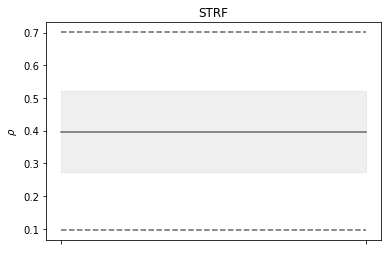

In [89]:
lag = 0.3
id = '100ms'
num_freqs = 80
model_name = f'STRF_freqs{num_freqs}_{id}'

corr_obj = STRFCorrelations(model_name)
threshold= corr_obj.get_normalizer_threshold(
    bin_width=bin_width, poisson_normalizer=True
)
baseline_dist_all_lags = {}
if lag is None:
    lags = np.sort(corr_obj.data['tmax'].unique())
    x_ticks = np.arange(len(lags))
    xtick_labels = list(lags)
    for i, lag in enumerate(lags):
        baseline_dist = corr_obj.get_corr_for_area(
            neural_area=area, bin_width=bin_width, delay=delay,
            threshold=threshold, normalized=normalized, lag=lag,
        )
        key = x_ticks[i]
        baseline_dist_all_lags[key] = baseline_dist

        print(f"Number of samples in distribution: {baseline_dist.size}")           

else:
    x_ticks = [0,1]
    xtick_labels = []
    # get baseline results..        
    baseline_dist = corr_obj.get_corr_for_area(
        neural_area=area, bin_width=bin_width, delay=delay,
        threshold=threshold, normalized=normalized, lag=lag,
    )
    print(f"Number of samples in distribution: {baseline_dist.size}")           
    # repeating baseline distribution, to allow plotting horizontal line..
    baseline_dist_all_lags = {key: baseline_dist.values for key in x_ticks}

# plotting the baseline..
model_name = 'STRF'
baseline_color = PlotterUtils.get_model_specific_color(model_name)
ax=RegPlotter.plot_line_with_shaded_region(data_dict=baseline_dist_all_lags,
                    color=baseline_color, alpha=alpha, #ax=ax,
                    display_dotted_lines=display_dotted_lines,
                    display_inter_quartile_range=display_inter_quartile_range
                    )

plt.ylabel(f"$\\rho$")
# plt.ylim([0.0, 1.0])
ax.set_xticks(x_ticks)
ax.set_xticklabels(xtick_labels)


        ## formatting the plot...
plt.title(f"{model_name}")
plt.xlabel(f"   ")


In [85]:
list(lags)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [59]:
np.median(baseline_dist)

0.4010548043331996

In [68]:
corr.get_correlations(
    [200206], bin_width=20, delay=0, threshold=0.0, lag=0.2
)

3011    0.275440
3012    0.465436
3013    0.315231
3014    0.460447
3015    0.407403
          ...   
3070    0.677462
3071    0.640780
3072    0.463671
3073    0.724969
3074    0.739757
Name: normalized_test_cc, Length: 64, dtype: float64

In [71]:
np.sort(corr.data['tmax'].unique())

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

### merge results..

In [9]:
from auditory_cortex.analyses import STRFCorrelations
model_name = 'STRF'
identifiers = [
    'freqs80_all_lags',
    'freqs80_bw50',
    # 'freqs80_5ms',
    # 'freqs80_20ms',
    # 'freqs80_40ms',
    # 'freqs80_60ms',
    # 'freqs80_80ms',
]
# output_identifier = 'freqs80_all_lags'

#### STRF_freqs80_100ms has results for the lags [100, 200, 300, 400, 500, 600]
####

STRFCorrelations.combine_and_ready(
    model_name=model_name, identifiers_list=identifiers, output_id=0,
    #   output_identifier=output_identifier
)
# BaseCorrelations.merge_correlation_results(
#     model_name=model_name, identifiers_list=identifiers, output_id=0, output_identifier=output_identifier
# )


Combining results...
Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_all_lags_corr_results.csv
Updating Normalizer...!
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_all_lags_corr_results.csv


In [22]:
corr.data

,session,channel,bin_width,delay,num_freqs,tmin,tmax,strf_corr,test_cc_raw,normalizer,normalized_test_cc
0,180413.0,0.0,20.0,0.0,80.0,0.0,0.2,-0.018500,-0.018500,0.012303,-0.166784
1,180413.0,1.0,20.0,0.0,80.0,0.0,0.2,0.040285,0.040285,-0.006701,NaN
2,180413.0,2.0,20.0,0.0,80.0,0.0,0.2,-0.048404,-0.048404,0.006253,-0.612122
3,180413.0,3.0,20.0,0.0,80.0,0.0,0.2,0.044913,0.044913,-0.004253,NaN
4,180413.0,4.0,20.0,0.0,80.0,0.0,0.2,0.011424,0.011424,-0.019774,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3431,200318.0,40.0,20.0,0.0,80.0,0.0,0.3,-0.038505,-0.038505,0.010472,-0.376268
3432,200318.0,41.0,20.0,0.0,80.0,0.0,0.3,-0.093023,-0.093023,-0.006748,NaN
3433,200318.0,42.0,20.0,0.0,80.0,0.0,0.3,0.027233,0.027233,-0.002358,NaN
3434,200318.0,43.0,20.0,0.0,80.0,0.0,0.3,-0.071272,-0.071272,-0.007007,NaN


### Baseline distribution...

In [13]:
from auditory_cortex.analyses.regression_correlations import Correlations
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter

In [5]:
model_name = 'wav2letter_modified'
identifier = 'trained_all_bins'

corr_obj = Correlations(model_name+'_'+identifier)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [7]:
area = 'all'
bin_width = 20
normalized = True
threshold = corr_obj.get_normalizer_threshold(bin_width=bin_width)
baseline = corr_obj.get_baseline_corr_for_area(
    neural_area=area, bin_width=bin_width, threshold=threshold, normalized=normalized)
print(threshold)

Reading exisiting normalizer thresholds...
0.06011905470334845


In [9]:
baseline_dist = baseline

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
alpha = 0.2

display_dotted_lines = True
display_inter_quartile_range = True

Number of samples in distribution: 216
model_name 'STRF' not recognizable!!!
Peak corr (median): 0.3781088243821915, occurs at x_coordinate: 0
Peak corr (max): 0.7711718586738501, occurs at x_coordinate: 0


[Text(0, 0, ''), Text(1, 0, '')]

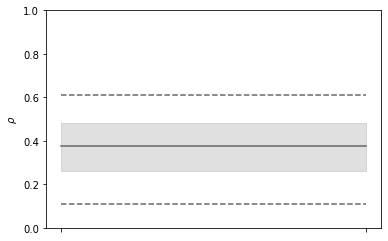

In [25]:
fig, ax = plt.subplots()

xticks = [0,1]
xtick_labels = []
print(f"Number of samples in distribution: {baseline_dist.size}")           
# repeating baseline distribution, to allow plotting horizontal line..
baseline_dist_all_lags = {key: baseline_dist.values for key in xticks}
xtick_labels = []

model_name = 'STRF'
baseline_color = PlotterUtils.get_model_specific_color(model_name)
ax=RegPlotter.plot_line_with_shaded_region(data_dict=baseline_dist_all_lags,
                    color=baseline_color, alpha=alpha, ax=ax,
                    display_dotted_lines=display_dotted_lines,
                    display_inter_quartile_range=display_inter_quartile_range
                    )

plt.ylabel(f"$\\rho$")
plt.ylim([0.0, 1.0])
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)


In [75]:
baseline.shape

(19,)

In [32]:
corr_obj = Correlations(model_name='STRF')

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [53]:
corr_obj.data.shape

(2442, 10)

In [4]:
corr_obj.data

,session,channel,bin_width,delay,strf_corr,normalizer,strf_corr_normalized,test_cc_raw,N_sents,normalized_test_cc
0,200206.0,0.0,20.0,0.0,0.118883,0.182100,0.277706,0.118883,500.0,0.278589
1,200206.0,1.0,20.0,0.0,0.197218,0.221232,0.418575,0.197218,500.0,0.419298
2,200206.0,2.0,20.0,0.0,0.154856,0.138041,0.415023,0.154856,500.0,0.416795
3,200206.0,3.0,20.0,0.0,0.331080,0.413360,0.509952,0.331080,500.0,0.514955
4,200206.0,4.0,20.0,0.0,0.087961,0.122019,0.251256,0.087961,500.0,0.251813
...,...,...,...,...,...,...,...,...,...,...
2253,190801.0,59.0,20.0,0.0,0.013906,-0.018708,NaN,0.013906,500.0,NaN
2254,190801.0,60.0,20.0,0.0,0.018908,-0.005677,NaN,0.018908,500.0,NaN
2255,190801.0,61.0,20.0,0.0,0.019551,-0.011830,NaN,0.019551,500.0,NaN
2256,190801.0,62.0,20.0,0.0,0.007693,-0.002653,NaN,0.007693,500.0,NaN


In [24]:
sessions = corr_obj.get_significant_sessions(threshold=0.061)
num_channels = 0
for session in sessions:
    # print(f"Session: {session}: num_channels: {len(channels)}")
    channels = corr_obj.get_good_channels(session, threshold=0.061)
    print(f"Session: {session}: num_channels: {len(channels)}")
    num_channels += len(channels)
num_channels


Session: 200206.0: num_channels: 63
Session: 191206.0: num_channels: 10
Session: 180720.0: num_channels: 5
Session: 191125.0: num_channels: 11
Session: 180731.0: num_channels: 14
Session: 180814.0: num_channels: 13
Session: 200213.0: num_channels: 14
Session: 200207.0: num_channels: 9
Session: 191210.0: num_channels: 3
Session: 191115.0: num_channels: 4
Session: 191113.0: num_channels: 27
Session: 180717.0: num_channels: 1
Session: 180627.0: num_channels: 1
Session: 180719.0: num_channels: 2
Session: 180807.0: num_channels: 13
Session: 200205.0: num_channels: 5
Session: 180808.0: num_channels: 3
Session: 200313.0: num_channels: 12
Session: 191121.0: num_channels: 7


217

In [64]:
session = 191113
num_channels = 0
ids_remove_list = []
for session in sessions:
    select = corr_obj.data[corr_obj.data['session'] == session]
    select = select[
        # (select['normalizer'] >= 0.061) &\
        (select['bin_width'] == 20) &\
        (select['delay'] == 0)
                    ]

    channels = select['channel'].unique()
    for channel in channels:

        if select[select['channel']==channel].shape[0] > 1:
            id = select[select['channel']==channel].index[1]
            ids_remove_list.append(id)


In [65]:
len(ids_remove_list)

184

In [66]:
corr_obj.data.shape

(2442, 10)

In [67]:
corr_obj.data.drop(ids_remove_list, inplace=True)

In [68]:
corr_obj.data.shape

(2258, 10)

In [69]:
corr_obj.write_back()

Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_corr_results.csv


In [44]:
channels

array([ 1.,  5.,  8.,  9., 11., 12., 13., 14., 16., 20., 21., 29., 30.,
       32., 34., 35., 36., 37., 38., 39., 41., 50., 51., 53., 55., 57.,
       58.])

In [55]:
ids_remove_list = []
if select[select['channel']==1].shape[0] > 1:
    id = select[select['channel']==1].index[1]
    ids_remove_list.append(id)



2

In [58]:
select[select['channel']==1].index[1]

1319

In [32]:
dist = corr_obj.get_baseline_corr_session(
    sessions=sessions, threshold=0.061
)

In [33]:
dist.shape

(266,)

In [42]:
import pandas as pd
delay = 0
bin_width = 20
threshold = 0.061
num_channels = 0

select_baseline = corr_obj.baseline_corr[
        (corr_obj.baseline_corr['bin_width']==bin_width)&\
        (corr_obj.baseline_corr['delay']==delay)
    ]

if threshold is not None:
    select_baseline = select_baseline[
        (select_baseline['normalizer']>=threshold)
    ]
if sessions is not None:
    # sessions should be list or None...
    session_baselines = []
    for session in sessions:
        session_select = select_baseline[(select_baseline['session']==float(session))]
        session_baselines.append(session_select)
        channels = session_select['channel']
        print(f"Session: {session}: num_channels: {channels.size}")
        num_channels += channels.size 
            
    baseline = pd.concat(session_baselines)    
num_channels

Session: 200206.0: num_channels: 63
Session: 191206.0: num_channels: 10
Session: 180720.0: num_channels: 5
Session: 191125.0: num_channels: 11
Session: 180731.0: num_channels: 14
Session: 180814.0: num_channels: 13
Session: 200213.0: num_channels: 14
Session: 200207.0: num_channels: 9
Session: 191210.0: num_channels: 3
Session: 191115.0: num_channels: 4
Session: 191113.0: num_channels: 54
Session: 180717.0: num_channels: 2
Session: 180627.0: num_channels: 2
Session: 180719.0: num_channels: 4
Session: 180807.0: num_channels: 26
Session: 200205.0: num_channels: 10
Session: 180808.0: num_channels: 3
Session: 200313.0: num_channels: 12
Session: 191121.0: num_channels: 7


266

In [40]:
baseline.shape

(266, 10)

In [27]:
corr_obj.baseline_corr

,session,channel,bin_width,delay,strf_corr,normalizer,strf_corr_normalized,test_cc_raw,N_sents,normalized_test_cc
0,200206.0,0.0,20.0,0.0,0.118883,0.183040,0.277873,0.118883,500.0,0.277873
1,200206.0,1.0,20.0,0.0,0.197218,0.221730,0.418827,0.197218,500.0,0.418827
2,200206.0,2.0,20.0,0.0,0.154856,0.139056,0.415273,0.154856,500.0,0.415273
3,200206.0,3.0,20.0,0.0,0.331080,0.413185,0.515063,0.331080,500.0,0.515063
4,200206.0,4.0,20.0,0.0,0.087961,0.122413,0.251407,0.087961,500.0,0.251407
...,...,...,...,...,...,...,...,...,...,...
2437,190801.0,59.0,20.0,0.0,0.013906,-0.019971,NaN,0.013906,500.0,NaN
2438,190801.0,60.0,20.0,0.0,0.018908,-0.007210,NaN,0.018908,500.0,NaN
2439,190801.0,61.0,20.0,0.0,0.019551,-0.012213,NaN,0.019551,500.0,NaN
2440,190801.0,62.0,20.0,0.0,0.007693,-0.003333,NaN,0.007693,500.0,NaN


### other..

In [75]:
sess = '200206'
num_alphas = 10
alphas = np.logspace(-2, 5, num_alphas)
estimator = RidgeCV(alphas=alphas, cv=5)

In [76]:
strf = STRF(
    session=sess,
     estimator=estimator)

In [77]:
batch = strf.get_sample(12)

In [78]:
batch[0].shape

(69, 32)

In [6]:
# corr = strf.fit()

  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
dataloader = DataLoader()

In [2]:
import torch.nn as nn
import torch

In [5]:
num_freqs = 32
sfreq = 100

spect = torch.randn((1, num_freqs, sfreq))

In [6]:
spect.shape

torch.Size([1, 32, 100])

30

In [66]:
in_channels = 32
tmin = 0.0
tmax = 0.3

past_samples = int(sfreq*tmax)
future_samples = int(sfreq*tmin) # zero for causal models...
kernel_size = past_samples + future_samples
padding = past_samples-1
extra_samples = padding - future_samples

conv = nn.Conv1d(
    in_channels=in_channels, out_channels=1,
    kernel_size=kernel_size, padding=padding, stride=1
)


In [67]:
out = conv(spect)[...,:-extra_samples]
out.shape

torch.Size([1, 1, 100])

In [57]:
extra_samples

-1

torch.Size([1, 1, 129])

In [2]:
dataloader = DataLoader()

In [3]:
sess = '200206'
spikes = dataloader.get_session_spikes(sess)

In [72]:
spikes[12].shape

(69, 64)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


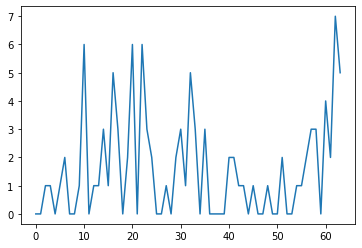

In [73]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(spikes[12][32])

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


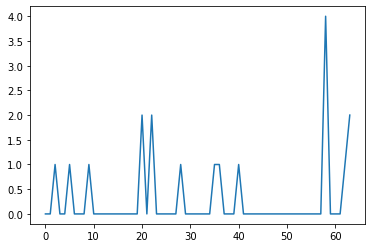

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(spikes[100][32])